*  https://www.youtube.com/watch?v=lFq5mYUWEBk -> code basics => ez understand 
* 
* 
* 
* 
*  
* < include a img from binary tree notes.ipynb in data-structures-and algorithm git>

1. what is BT 

A binary tree is a tree data structure where each node has at most two children, referred to as the left child and the right child.

Node Structure
A node in a binary tree contains three parts:

    * Data or Value
    * Pointer or Reference to the left child
    * Pointer or Reference to the right child

representation of a node:

    class Node:
        def __init__(self, value):
            self.value = value
            self.left = None
            self.right = None

         1
        / \
       2   3
      / \
     4   5

    root = Node(1)
    root.left = Node(2)
    root.right = Node(3)
    root.left.left = Node(4)
    root.left.right = Node(5)

2. keywords / elements in BT 
    * root - topmost node in a binary tree. It's the starting point for traversing or searching the tree.
    * child - Every node in a binary tree can have at most two children nodes: a left child and a right child.
    * parent - A node is called a parent if it has at least one child node.
    * ancestor - An ancestor of a node N is any node on the path from the root to N, excluding N itself.
    * leaf node - a node that does not have any children.
    * sub tree -  is a portion of a binary tree that can itself be considered as a binary tree. It consists of a node in the original tree and all of its descendants.
    * height 
    * lvl - The level of a node is its distance from the root. The root is at level 0, its children are at level 1, their children are at level 2, and so on.

        - Level refers to the relative position or depth of a node within the tree structure, starting from the root at level 0.
        
        - Helps in understanding and visualizing the relative positions of nodes.
        
        - Aids in solving problems related to finding ancestors, descendants, or nodes at a specific depth.
        
    * height - The height of a binary tree is the length of the longest path from the root node down to the farthest leaf node.

        - Height is a measure of the tree's overall structure, indicating how tall the tree is from its root to the deepest leaf node.
        
        - Helps in analyzing and understanding the tree's balance.
        
        - Useful for determining time complexity of tree operations.
        
        

3. types of BT 
    * full BT 
    * complete BT 
    * perfect BT 
    * balanced BT 
    * degenerate / pathological BT 
    * 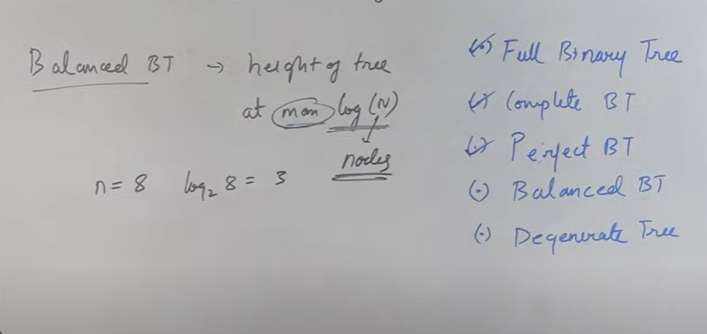

4. operations 
    * traversals (BFS, DFS[inorder, pre, post])
    * insert (root, node, leaf node)
    * delete(root, node, leaf node)
    * find min max value in tree 

1. BT rep 

    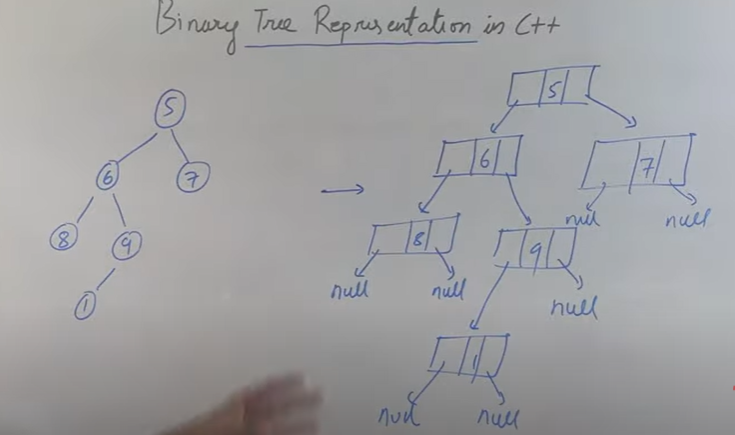

2. samplet create (Node structure)

    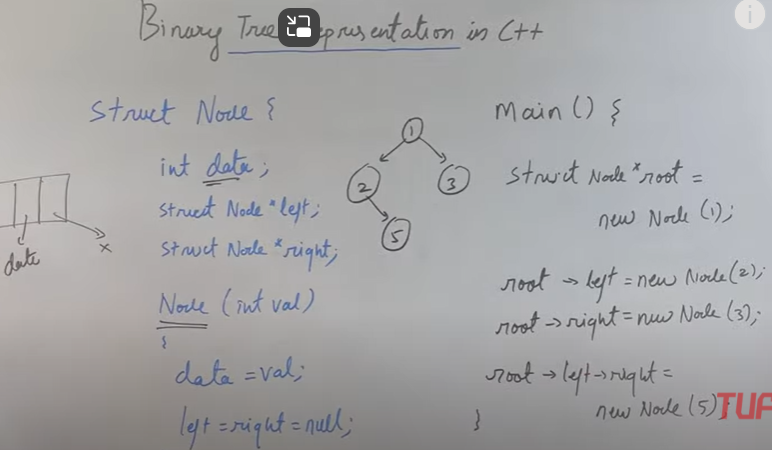

1. Pre order 

    * TC -> O(N)
    * SC -> O(N)

    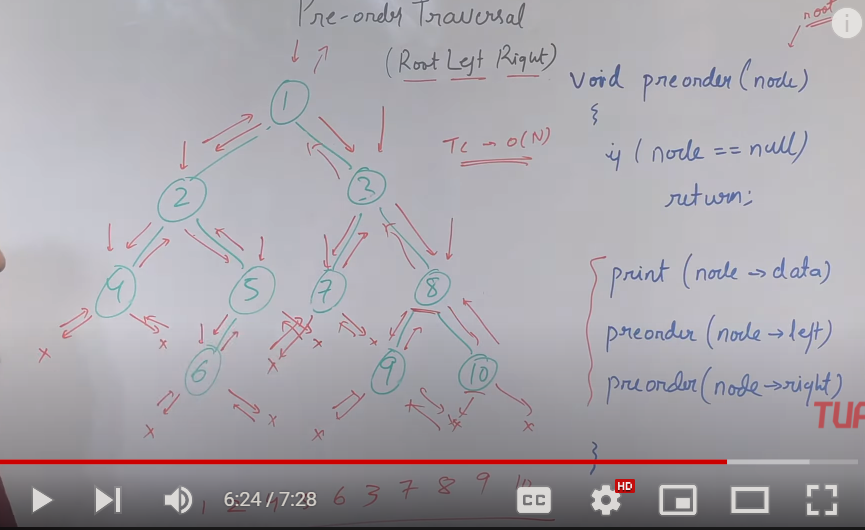

2. In order 

    * 
    * 

    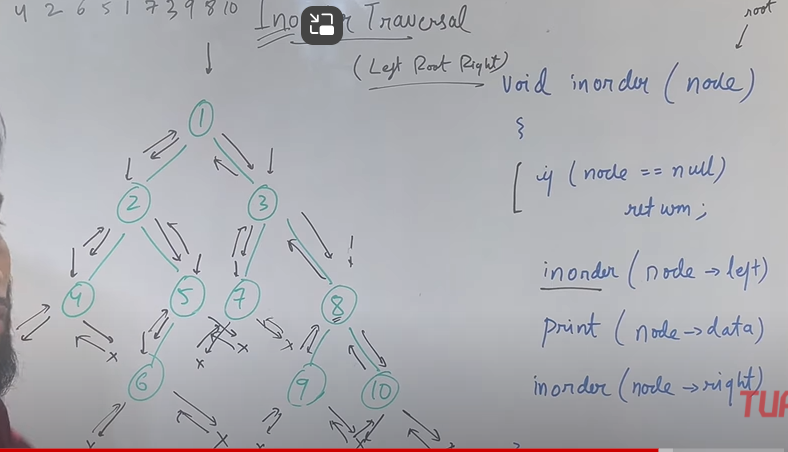

3. Post order 

    * 
    * 

    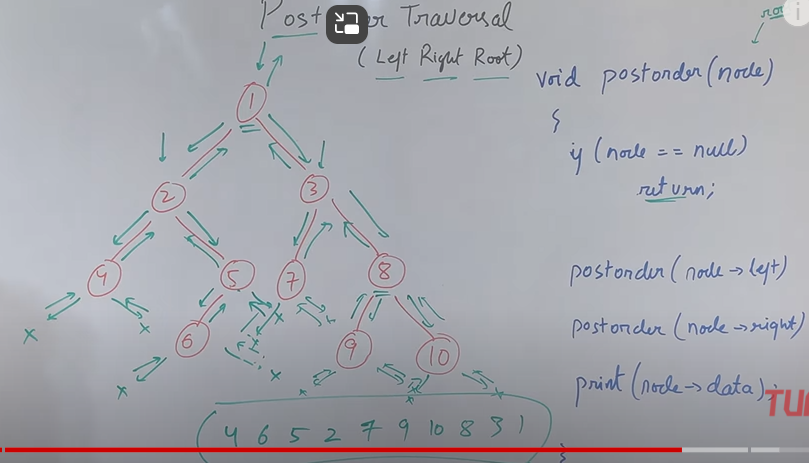

4. level order (BFS)

    * 
    * 

    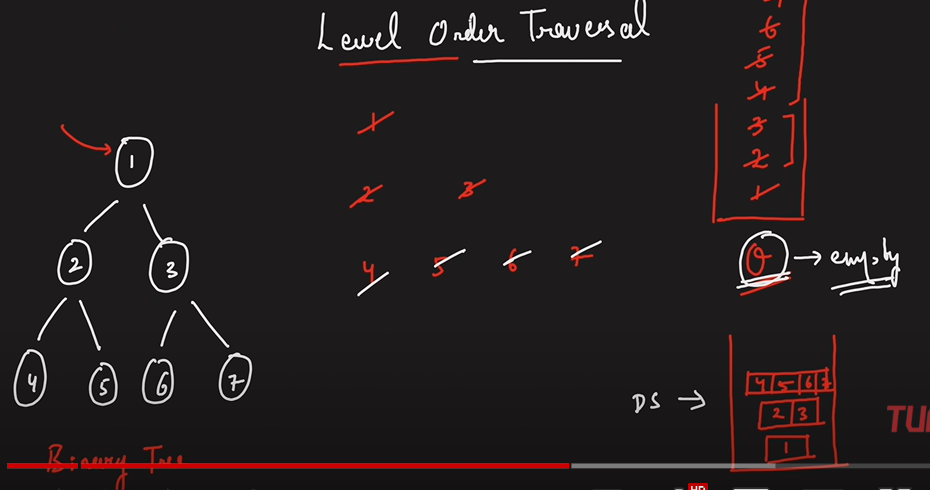

    L8 - https://www.youtube.com/watch?v=EoAsWbO7sqg&list=PLgUwDviBIf0q8Hkd7bK2Bpryj2xVJk8Vk&index=9 (Refer once and opt chk ?)

In [41]:
from queue import Queue,LifoQueue

class Node:
    def __init__(self,value):
        self.value=value
        self.left=None
        self.right=None

#NOTE - below listed are basics and acts as foundations for many pblms (get a good grip on that !)
# 1. height of Btree/max depth of Btree
# 2. width of Btree

class Btree:
    def __init__(self):
        self.root=None
        self.diameter=0
        self.mps=0

    #this is lvl order travesal/ BFS too
    def buildtree(self,l):
        if len(l)==0:
            return None
        else:
            q=Queue()
            self.root=Node(l[0])
            q.put(self.root)#l[0]


            for i in range(1,len(l),2):
                prev_ele=q.get()#at 1st itr u have head 
                if l[i]:
                    prev_ele.left=Node(l[i])
                    q.put(prev_ele.left)#put in q
                if i+1<len(l) and l[i+1]:#NOTE few chks needed to be done here (have to chk if there is a element here, might not have since prev may be the last ele)
                    prev_ele.right=Node(l[i+1])
                    q.put(prev_ele.right)
            #at last the queue is left with all the -> leaf elements 

    def inorder(self,node):# L Root Right 
        if node is None:return 
        self.inorder(node.left)
        print(node.value,end=" ")# ans.append(node.value)
        self.inorder(node.right)
        
    def preorder(self,node):# Root L R
        if node is None:return 
        print(node.value,end=" ")
        self.preorder(node.left)
        self.preorder(node.right)

    def postorder(self,node):#L R Root 
        if node is None:return 
        self.postorder(node.left)
        self.postorder(node.right)
        print(node.value,end=" ")

    #Recursive => TC:O(N), SC:O(N)[recurive stack space]
    #Iterative => TC:O(N), SC:O(1)[only auxillary space] => BEST 
    def preorder_itr(self,node):
        if not self.root:#node
            return None 
        else:
            #push root to stk 
            s=LifoQueue()#stk 
            s.put(self.root)#node

            while s.qsize(): #while stk is not empty 
                prev_ele=s.get()
                print(prev_ele.value,end=" ")
                if prev_ele.right:
                    s.put(prev_ele.right)
                if prev_ele.left:
                    s.put(prev_ele.left)

    def inorder_itr(self,node):
        if not self.root:
            return None
        else:
            
            #here cant use same like prev element appr coz -> u neeed to pop everytime to get the prev ele , in this case we can pop but will print only later, thus not that appr 
            s=LifoQueue()
            curr=self.root 
            while curr or s.qsize(): #coz at first stk is empty this to pass that we include curr == True contd, which is true as initially curr is root itself 
                if curr:
                    s.put(curr)
                    curr=curr.left
                else:
                    curr=s.get()
                    print(curr.value,end=" ")

                    curr=curr.right

            """
            s=LifoQueue()
            curr=self.root 
            while True:
                if curr:
                    s.put(curr)
                    s=s.left
                else:
                    if not s.qsize():
                        break;
                    curr=s.get()
                    print(curr.value,end=" ")
                    curr=curr.right
                """

    #TC O(N), SC O(2N)
    def postorder_itr_2s(self,node):
        s1=LifoQueue()
        s2=LifoQueue()
        if not self.root:
            return None
        else:
            s1.put(self.root)#cant simply put the value instead put node on s1, but can directly put val on s2 as we only intedn to print it and not traverse it 

            while s1.qsize():
                curr=s1.get()
                s2.put(curr.value)
                if curr.left:
                    s1.put(curr.left) 
                if curr.right:
                    s1.put(curr.right)
            #now pop and print the stk 
            while s2.qsize():
                print(s2.get(),end=" ")
        
    #one stk soln -> TC O(2N), SC O(N)
    def postorder_itr_1s(self,node):
       #L R Root => 
        #here we need to make use of top ele, but we cant pop it => no stk impl in py have a top feature, so using a list here instead of (collections.dequeue, lifoQueue etc)
        #(NOTE: pblm with list is that it stores the ele in contigious mem location, so it might run out of space if the value is very much higher) 
        if self.root is None:
            return None
        else:
            s=[]
            curr=self.root
            while curr or s:#initially s is empty, so including that in or contd, to enter the loop 
                if curr:
                    s.append(curr)
                    curr=curr.left
                else:
                    if s[-1]:
                        temp=s[-1].right #set curr to explore the right subtree 
                    else:
                        temp=None

                    #if the right child is also none -> pop and print the val, as both the left and right has been visited 
                    if not temp: #temp == None, (ie) right is also none (when already left is right) => leaf node 
                        temp=s.pop()
                        print(temp.value,end=" ")

                        #without this while u will keep on facing the prev node, which has to be removed, since u have visited its left and right (so go ahead pop and print)
                        while s and temp==s[-1].right: #breaking contd where (only left subtree of a node is visited, then it will break and u have to look out for right)
                            temp=s.pop()
                            print(temp.value,end=" ")
                    #if it has a right then, we have to explore more so set curr to that Node (temp) and so that it will start to look for left 1st then right and then print 
                    else:
                        curr=temp

    #all traversal in single flow (and a single stk) [this stk store (node,num)]
    def all_traversals(self,node):
        pre=[]
        inord=[]
        post=[]
        s=[] #can use a stk (but python stk impl doest have top, only has a pop ,so using a list)
        if self.root is None:
            return [pre,inord,post]
        else:
            s.append([self.root,1])
            while len(s)>0:#while s is not empty 
                curr,num=s[-1]
                
                if num==1:
                    pre.append(curr.value)
                    s[-1][1]+=1
                    if curr.left:
                        s.append([curr.left,1])
                
                elif num==2:
                    inord.append(curr.value)
                    s[-1][1]+=1
                    if curr.right:
                        s.append([curr.right,1])

                elif num==3:
                    post.append(curr.value)
                    s.pop()#remove that ele as it reached the max value of num==3
                

        return [pre,inord,post]

    #NOTE i made use of a extra small list addn SC , TODO https://takeuforward.org/data-structure/zig-zag-traversal-of-binary-tree/ here its not used chk and do => Nope here also they did same
    # O(N), O(N)
    def zigzag_traversal(self,node):
        if not node:
            return []

        q=Queue()
        q.put(self.root)
        #flag 0(false) -> means trav from L-R
        #flag 1(true) -> means trav from R-L
        leftToright=True #/flag

        #can maintain another DS (like Q, list) instead of printing (if they ask us to return)
        l=[]

        while q.qsize():
            size=q.qsize()
            sl=[] #row =[0]*size
            for _ in range(size):
                curr=q.get()
                # # Determine the index to insert the node's value based on the traversal direction
                # index = i if leftToRight else (size - 1 - i)
                
                # # Insert the node's value at the determined index
                # row[index] = node.data
                if curr.left: q.put(curr.left)
                if curr.right: q.put(curr.right)

                #store that curr / print it (in case of flag 1 print/ store in reverse)
                sl.append(curr.value) #small curr is needed to be stored this is the place where it needed to be done 
            
            if leftToright:# true(l-r)
                l.append(sl)
            else:# false(r-l)
                l.append(sl[::-1])

            leftToright=not leftToright #revert the flag 

        return l

    # 1. left boundary [take right only if there is no left] Excluding LEAF NODES 
    # 2. LEAF NODES -> do a inorder traversal and take only the leafs (if u do pre/post order then the values will change order if all the leafs are not on the same level)
    # 3. Right boundary on REVERSE [take left of there is no right] Excluding LEAF NODES 
    def boundary_traversal(self,node):
        r=[]
        if node is None:
            return []
        #1. left 
        while node:
            if node.left or node.right:#if not both then its leaf (dont add them)
                r.append(node.value)
                
            if node.left:
                node=node.left
            elif node.right:
                node=node.right
            else:
                node=None
        # print(f'---after left part {r}---')

        #2. gather leafs by inorder 
        curr=self.root #node gets modified by prev loop (either save it and use or make use of root)
        s=LifoQueue()

        while curr or s.qsize():
            if curr:
                s.put(curr)
                curr=curr.left
            else:
                prev_ele=s.get()
                if not prev_ele.left and not prev_ele.right: #                if prev_ele.left is None and prev_ele.right is None:
                    r.append(prev_ele.value) #only to include the leafs value and not all of the nodes 
                curr=prev_ele.right      

        # print(f'---after leaf part {r}---')

        #3. right (reverse order) => maintain stk ds, after compl pop it and add to org whole res  
        # starting from root.right as root has been covered in the left part 
        node=self.root.right    #node.right is modified already by prev loops (either save and use /make use of self.root.right) 
        # s=LifoQueue() -> can use a stk but need to pop after compl and add to result (hence iam using list)
        sl=[] #or simply maintain a list, reverse the list and append to the whole result

        while node: #self.root 
            if node.left or node.right: #obly put if its a leaf Node 
                sl.append(node.value)    #s.put() in case of stk 
            if node.right:
                node=node.right
            elif node.left:
                node=node.left
            else:
                node=None

        # print(f'---after right sl is {sl} NOTE to make rev of it ---')

        #rev small list and concat
        r=r+sl[::-1]

        # print(f'---after right part {r}---')


        return r

    
    #can use lvl-order or recurrance relation 
    #NOTE max-depth == height of bTREE
    #NOTE The height of the tree is equal to the number of nodes on the longest path from root to a leaf.
    #https://www.youtube.com/watch?v=eD3tmO66aBA = refer this vdo for TC and SC analysis 

    #NOTE: use rec coz => btrees not tend to b skewd in most cases (SC is wrst in case of a skewed tree,which happens very less so this option better)
    #1. here using rec relation 
    #TC O(N), SC O(N)[in case of skewed tree] BUG not fully done 
    def max_depth(self,node):
        if not node:
            return 0
        return 1+max(self.max_depth(node.left),self.max_depth(node.right))
        
    def md_lvl_order(self,node):
        q=Queue()
        lvl=0
        q.put(node)

        while q.qsize():
            size=q.qsize()
            
            for _ in range(size):
                front=q.get()
                if front.left: q.put(front.left)
                if front.right: q.put(front.right)
            lvl+=1

        return lvl
    
    #https://www.youtube.com/watch?v=Yt50Jfbd8Po => FOR TC and SC BUG  not fully done
    def is_balanced_btree(self,node):
        #try rec soln 
        if node:
            lt=self.is_balanced_btree(node.left)#1
            rt=self.is_balanced_btree(node.right)#
            if lt==-1 or rt==-1 or abs(lt-rt) > 1: #for a balanced btree for every node shld satisfy lt-rt <=1
                return -1
            #if the lt-rt <=1 and its lt, rt also doesnt have lt-rt > 1
            return max(lt,rt)+1
        else:
            return 0

    #NOTE The Diameter of a Binary Tree is the longest distance between any two nodes of that tree. This path may or may not pass through the root.
    #BUG not understood => rewatch and understand (theo + BF + Optimal soln too)

    #TODO there are 3 more ways look them onre by one and impl
    def calculate_height(self,node):
        if node:
            lh=self.calculate_height(node.left)
            rh=self.calculate_height(node.right)

            self.diameter=max(self.diameter,lh+rh)    
            return 1+max(lh,rh)        
        else:
            return 0
    def diameter_btree(self,node):
        self.calculate_height(self.root)
        return self.diameter
    
    #TC O(N) SC O(N) but how is that diff from others (ilke one having o(N*N) => BUG maybe there they are using a external function to calculate the lh and rh and using that in dbtree mtd)
    #but now we modified the same func and finding the dia of each node from BOTTOM -> UP and storing the value if its greater than the previous !!! 

    # NOTE this function's final return wont be our result, our actual result wat we store on self.diamter, coz return only gives the last runs value, which maynt be the maximum 
    #so returning that wont be of any use and erraneous (thus for results,make use of the diameter of that obj !! ) [refer abv thats y using nested functions !]
    def dbtree(self,node):
        if not node:
            return 0
        lh=self.dbtree(node.left)
        rh=self.dbtree(node.right)
        self.diameter=max(self.diameter,lh+rh)#we are comparing with prev cal max and update if found a greater val for dia
        return 1+max(lh,rh)#we are returning the [max_depth of that node] which is also dia of that node(the longest distance between any two nodes of that tree, passing via the given "node", passed as arg)

    # #TC O(N), SC O(N) - appr 2/3 ?
    # def dbtree_opt(self,node):
    #     pass

    #TODO what if i dont want to make use of init ?,can i pass the mps everytime to func and compare and update if max acheived 
    #TC o(N),  

    #NOTE for bt5 mps shld be 30 (edge case -> where leafs have -ve vals) but our code will return 10
    #NOTE (important) for this the 2 nodes need not to be a leaf node (u can ignore leaf node values if they are neagtive), bcoz 
    #when its value is -ve it will reduce ur mps for the node, so better ignore that by simply returning 0, if the mps(node) is -ve 
    #for bt5 the maxpathsum is 45 with path [10 -> 15 -> 20 ] thats it not more than that, 
    #(if i would have included the -ve value returning mps then my val will be reduced and i will lose a potential path)
    def max_pathsum(self,node):
        if not node:
            return 0
        lt_mps=max(0,self.max_pathsum(node.left)) #NOTE comparing with 0, so that when there is a -ve num then 0 is retured 
        rt_mps=max(0,self.max_pathsum(node.right)) #without this modification bt5 would give wrong answers 

        #mps is maxpathsum of a tree (defined in init)
        self.mps=max(self.mps, node.value+lt_mps+rt_mps)

        return node.value+lt_mps+rt_mps

    #BF(), itr way, rec with any one traversals (can also take the root and do travseal and store them in arrs and compare them later (this is extreme BF- not recommended))
    def chk_identical_itr(self,node):
        
        if not self.root and not node:
            return True
        if not self.root or not node:
            return False
        
        q1=Queue()
        q1.put(self.root)
        q2=Queue()
        q2.put(node)

        while q1.qsize() and q2.qsize():
            curr1=q1.get()
            curr2=q2.get()

            if curr1.value!=curr2.value:
                return False
            if curr1.left and curr2.left:
                q1.put(curr1.left)
                q2.put(curr2.left)
            elif curr1.left or curr2.left:
                return False
            if curr1.right and curr2.right:
                q1.put(curr1.right)
                q2.put(curr2.right)
            elif curr2.left or curr2.right:
                return False
            
        return q1.empty() and q2.empty()
    
    @classmethod
    def chk_identical_rec(self,node1,node2):
        if node1 is None and node2 is None: #Base contd 
            return True
        if node1 is None or node2 is None:
            return False 
        
        #like pre order chk for (Root (value), then Left and then Right)
        return (node1.value==node2.value and 
                self.chk_identical_rec(node1.left,node2.left) and
                self.chk_identical_rec(node1.right,node2.right))
        
    
        

            
if __name__=="__main__":
    bt1=Btree()
    bt1.buildtree(l=[1,None,2,3,4,5,6,None,7])

    bt2=Btree()
    bt2.buildtree(l=[1,2,None,3,4,5,6,7])
    # print(bt2.all_traversals(bt2.root))

    bt3=Btree()
    bt3.buildtree(l=[1,2,3,None,None,4,6,5,None,None,7,9,None,None,8])

    bt4=Btree()
    bt4.buildtree(l=[-10,9,20,None,None,15,7])

    bt5=Btree()
    bt5.buildtree(l=[15,10,20,None,None,-30,-15])

    bt6=Btree()
    bt6.buildtree(l=[1,2,3,4,5,None,6])

    bt7=Btree()
    bt7.buildtree(l=[1,2,7,3,None,None,8,None,4,9,None,5,6,10,11])

    # print("\n-----PREORDER-----")#[1,2,3,5,6,4,7]
    # bt1.preorder(bt1.root)
    # print()
    # bt1.preorder_itr(bt1.root)

    # print("\n-----INORDER-----")#[1,5,3,6,2,4,7]
    # bt1.inorder(bt1.root)
    # print()
    # bt1.inorder_itr(bt1.root)

    # print("\n-----POSTORDER-----")#[5,6,3,7,4,2,1]
    # bt1.postorder(bt1.root)
    # print()
    # bt1.postorder_itr_2s(bt1.root)
    # print()
    # bt1.postorder_itr_1s(bt1.root)

    # print("\n-----ALL TRAVS-----")
    # list_of_all_travs=bt1.all_traversals(bt1.root)
    # print(list_of_all_travs)

    # md=bt1.max_depth(bt1.root)
    # print(f'max_depth is: {md}')

    # md=bt1.md_lvl_order(bt1.root)
    # print(f'max_depth is: {md}')

    # b_btree=bt1.is_balanced_btree(bt1.root)
    # print("is balanced") if b_btree!=-1 else print("not balanced")

    # b_btree=bt2.is_balanced_btree(bt2.root)
    # # print(f'Is balanced btree {b_btree}')
    # print("is balanced") if b_btree!=-1 else print("not balanced")

    # print(bt3.root.value)
    # d=bt3.diameter_btree(bt3.root)
    # print(f'dia is {d}')

    # print(bt3.root.value)
    # bt3.dbtree(bt3.root)
    # print(f'dia is {bt3.diameter}')

    # bt4.max_pathsum(bt4.root)
    # print(f'max path sum is {bt4.mps}')

    # bt5.max_pathsum(bt5.root)
    # print(f'max path sum is {bt5.mps}')

    # res=Btree.chk_identical_rec(bt4.root,bt4.root)
    # print(res)

    # res_list=bt6.zigzag_traversal(bt6.root)
    # print(f'Zig zag traversal :{res_list}')

    res_list=bt7.boundary_traversal(bt7.root)
    print(f'boundary traversal :{res_list}')
     
    

boundary traversal :[1, 2, 3, 4, 5, 6, 10, 11, 9, 8, 7]


In [32]:
l=[1,2,3,4,5]
sl=[6,7,8]
l=l+sl[::-1]
print(l)

[1, 2, 3, 4, 5, 8, 7, 6]


In [20]:
if True and True:
    print(1)

elif True or False:
    print(2)

1


In [25]:
f=1 
print(f)
f=not f
print(f)

1
False


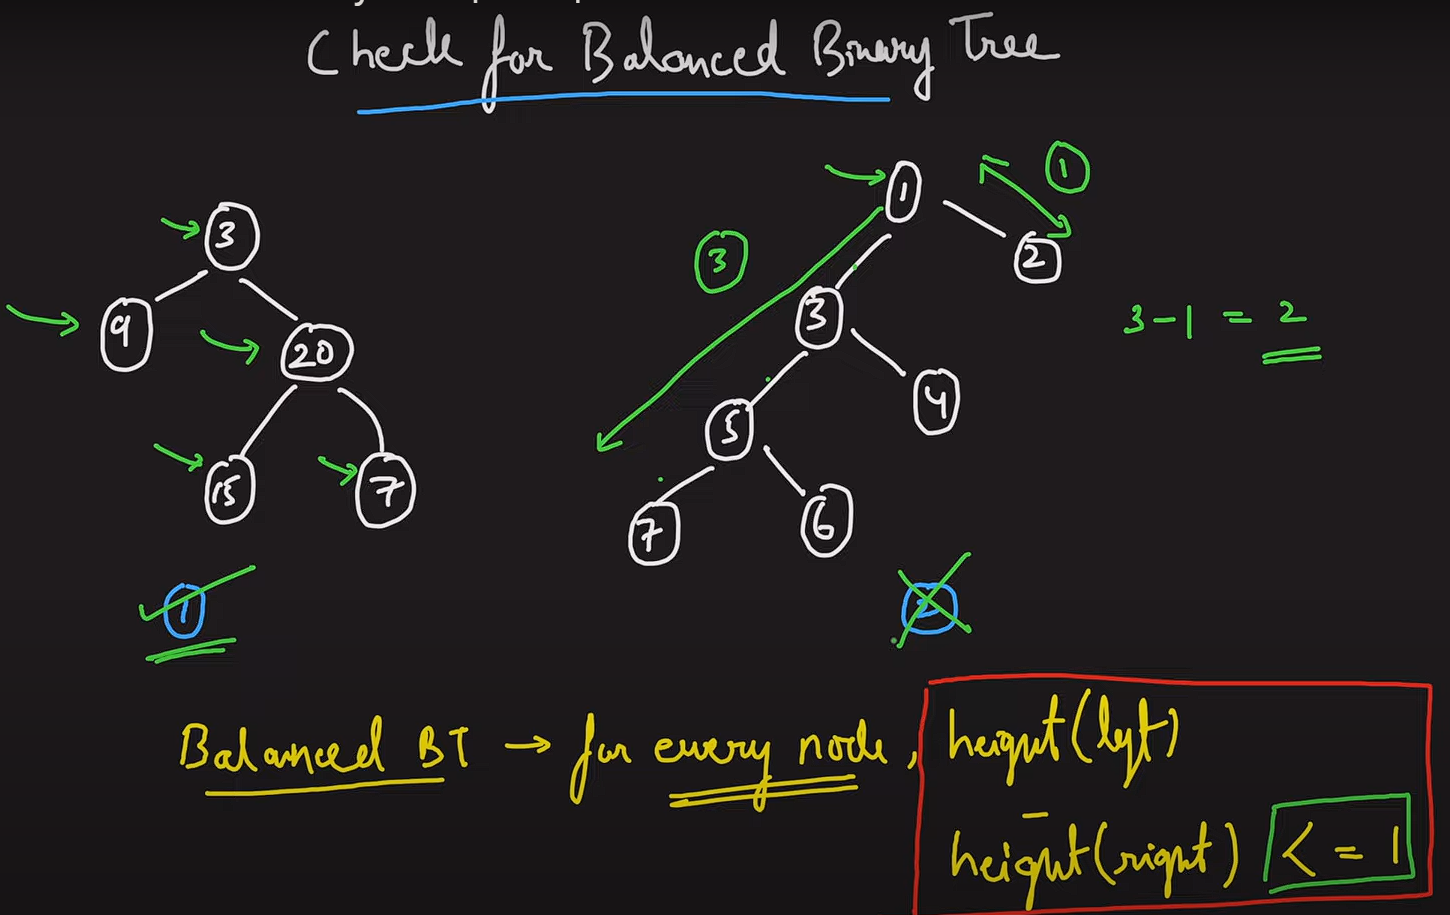

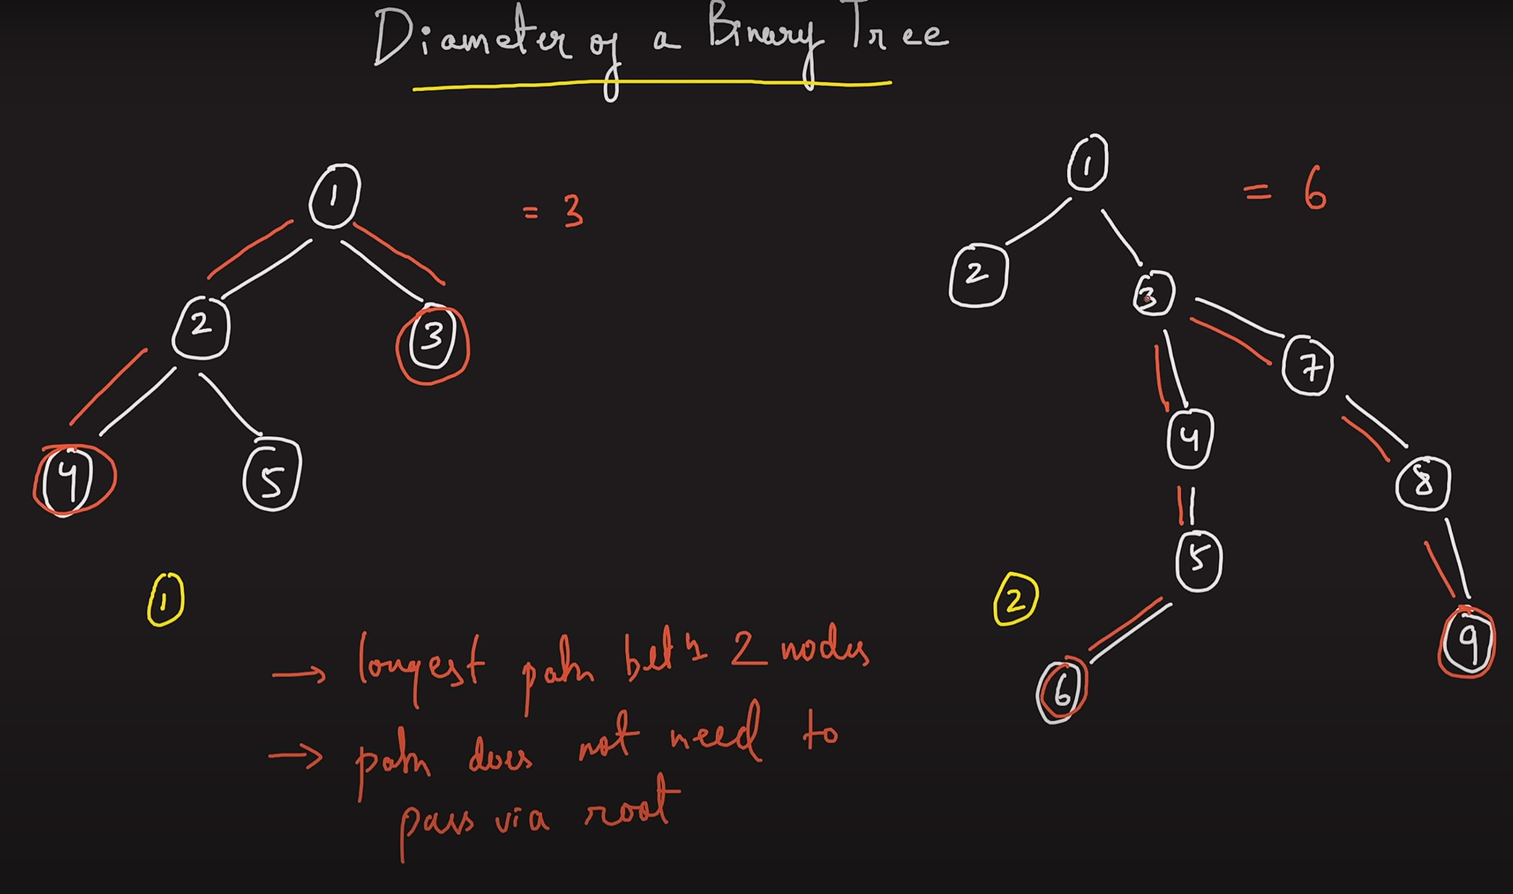
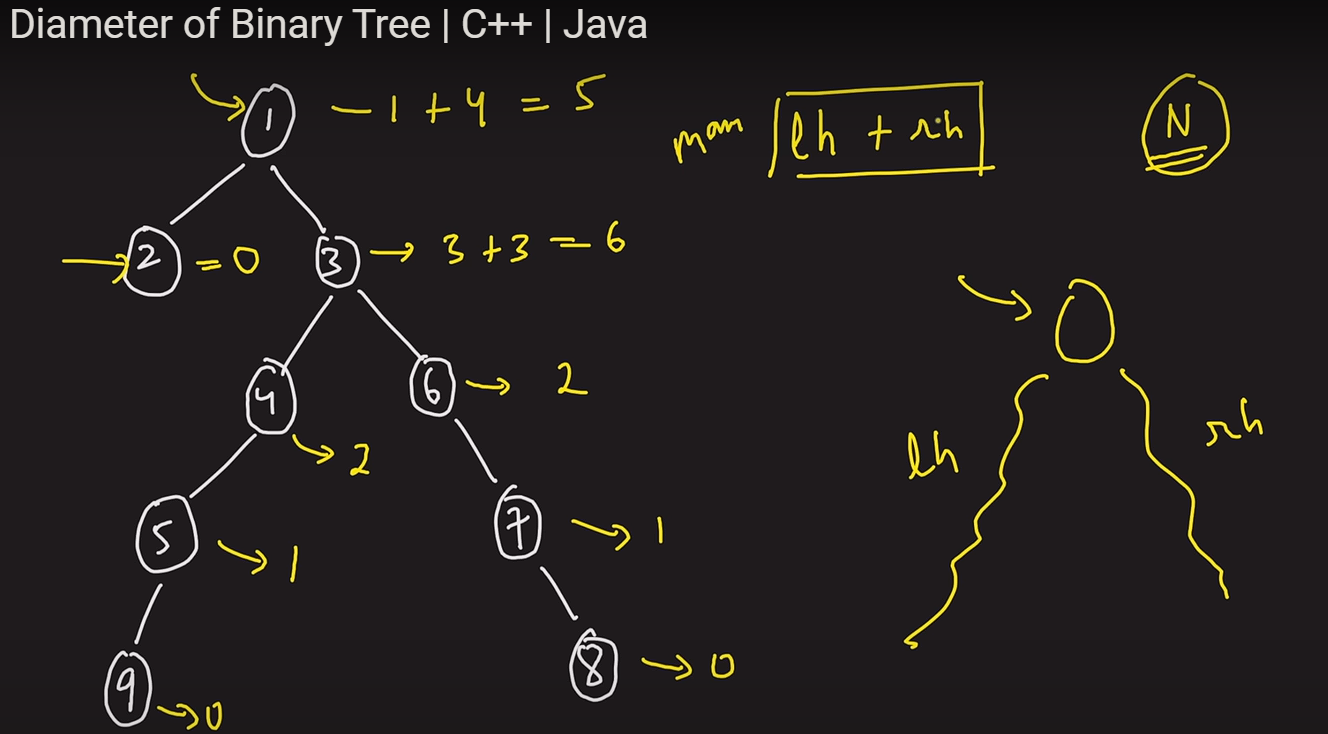

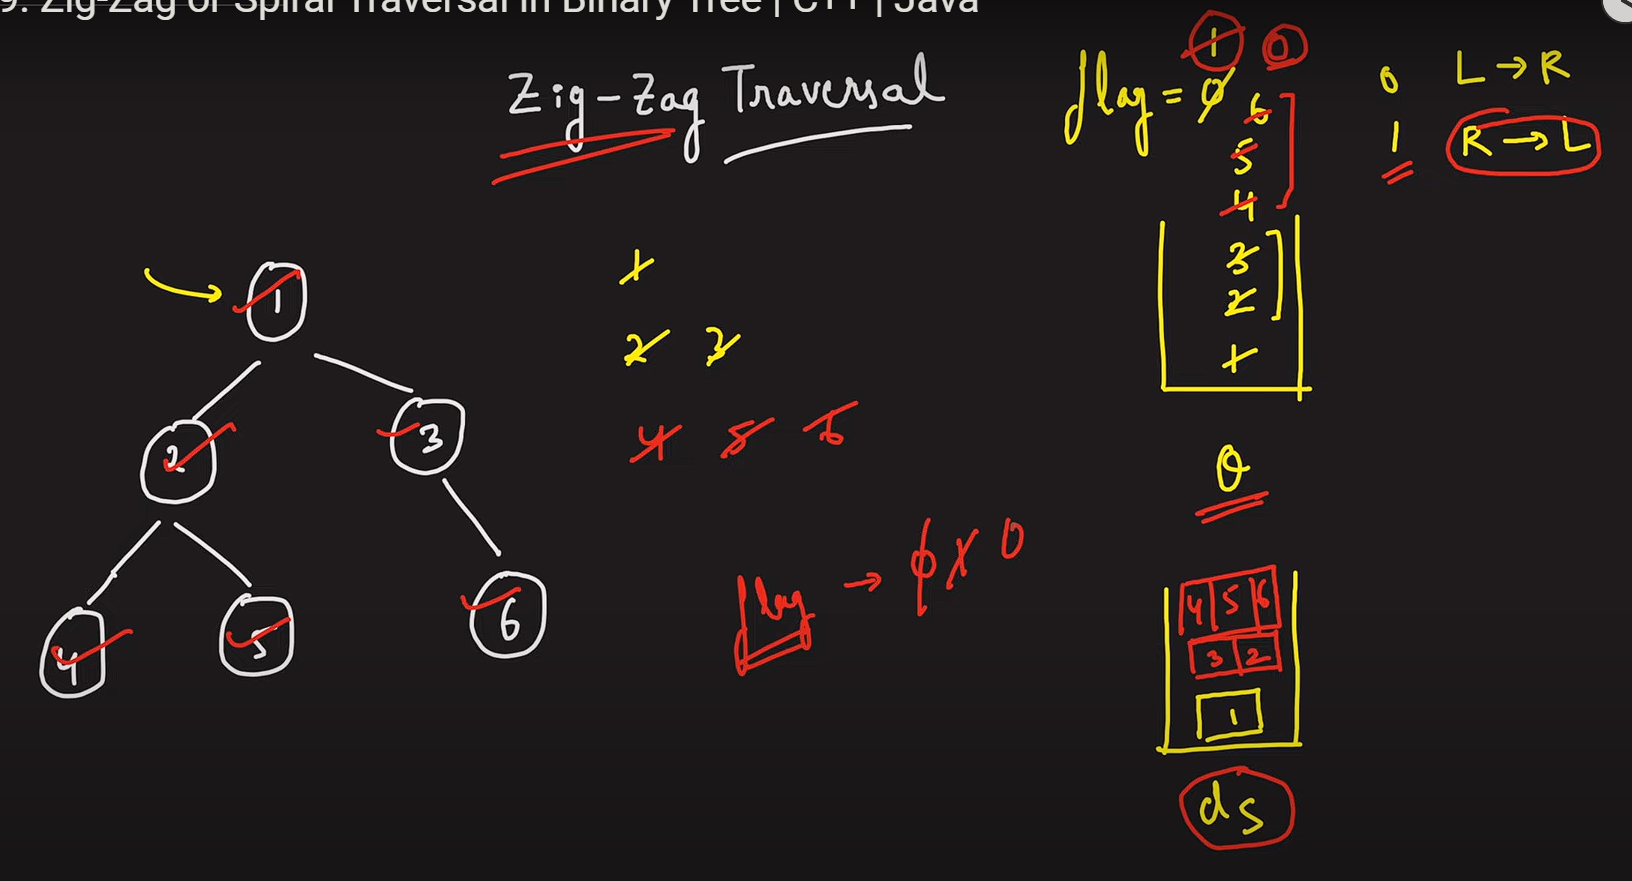

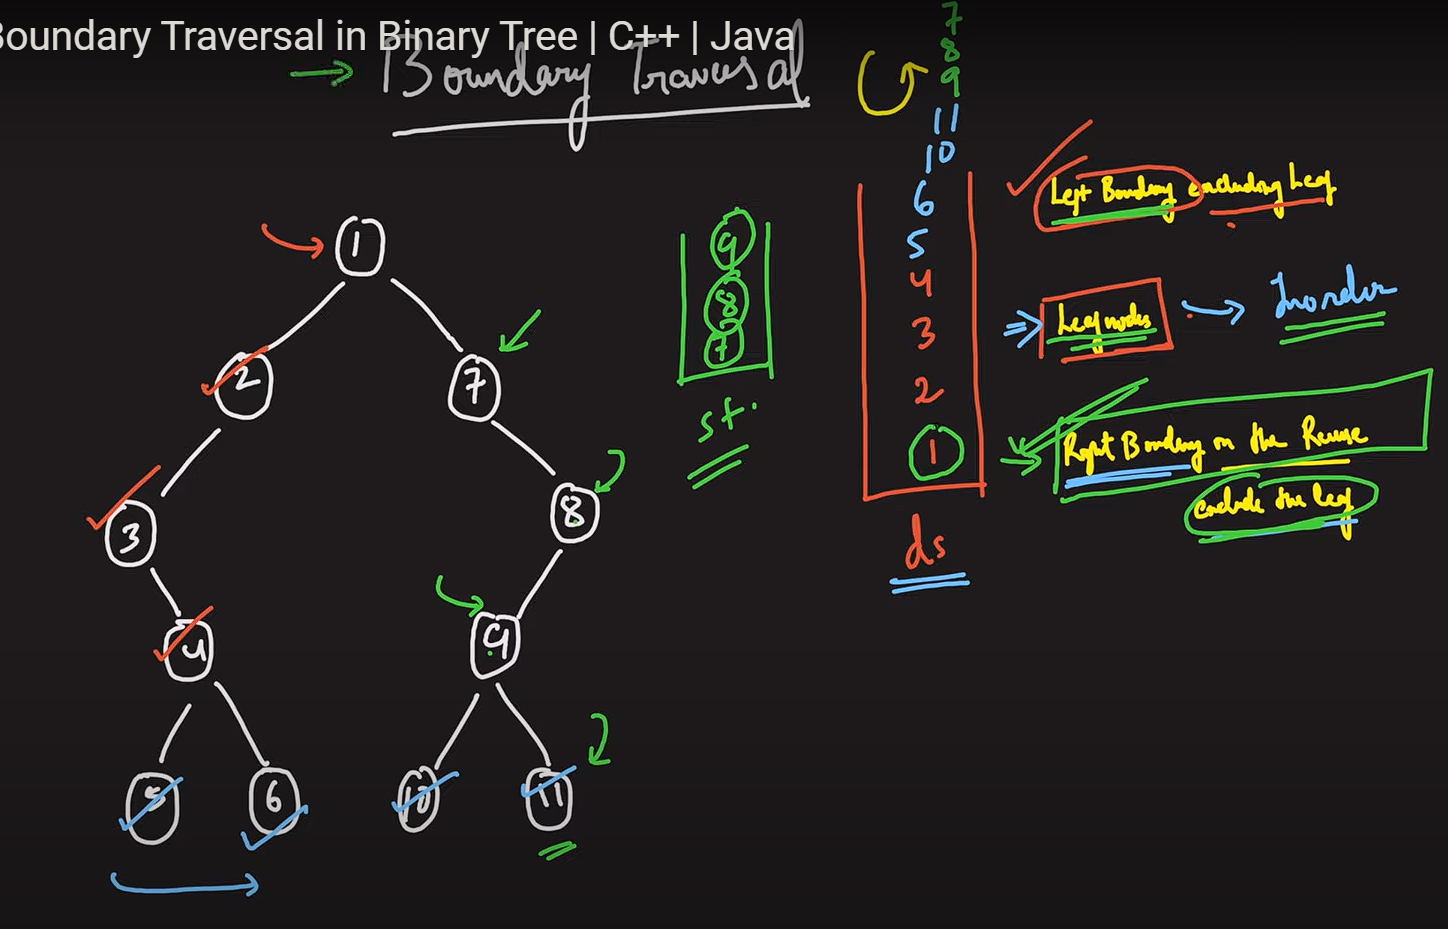
* abv code is working fine but chk once with blw pasted img and verify many TCases on leetcode 
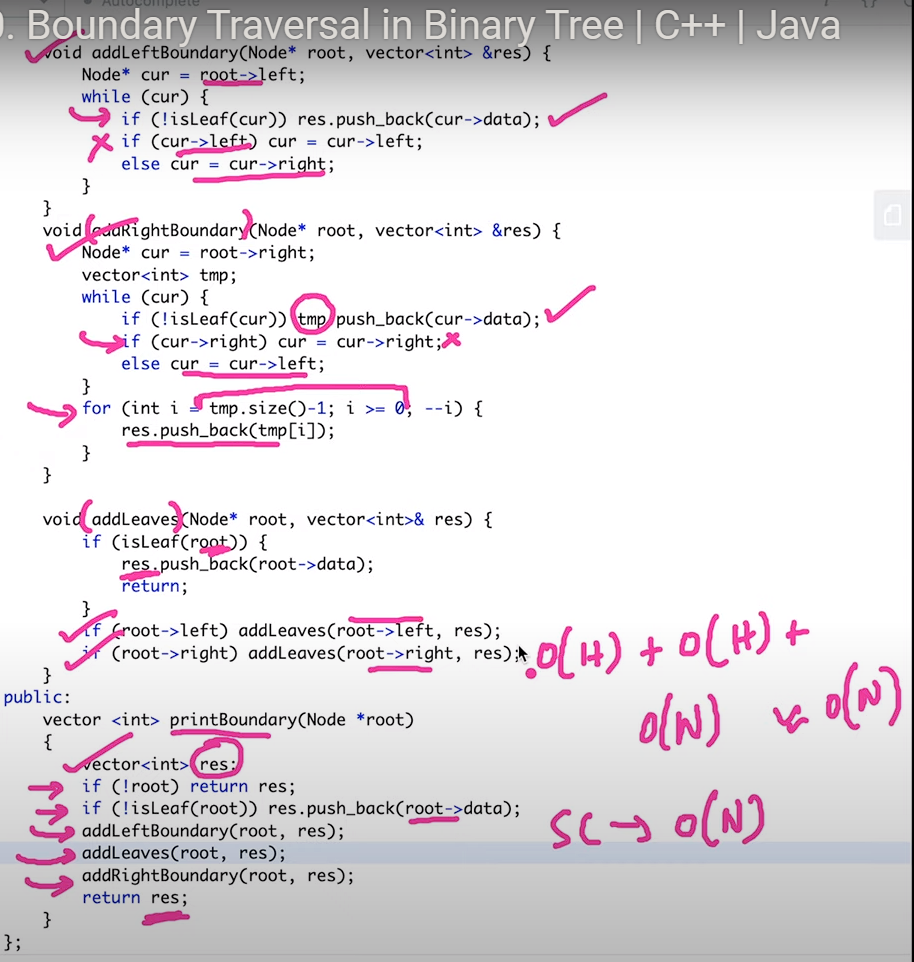

In [ ]:
l=[1,None,2,3,4,5,6,None,7]
from queue import Queue
q=Queue()

q.put(l[0])
q.put(l[1])
q.put(l[2])
q.put(l[3])

print(q.queue)

ele=q.get()
print(ele)
print(q.queue)

deque([1, None, 2, 3])
1
deque([None, 2, 3])


1. iterative Pre 

    * TC -> O(N)
    * SC -> O(N) => what is the worst case ??? {markd blw and why is that ??}

    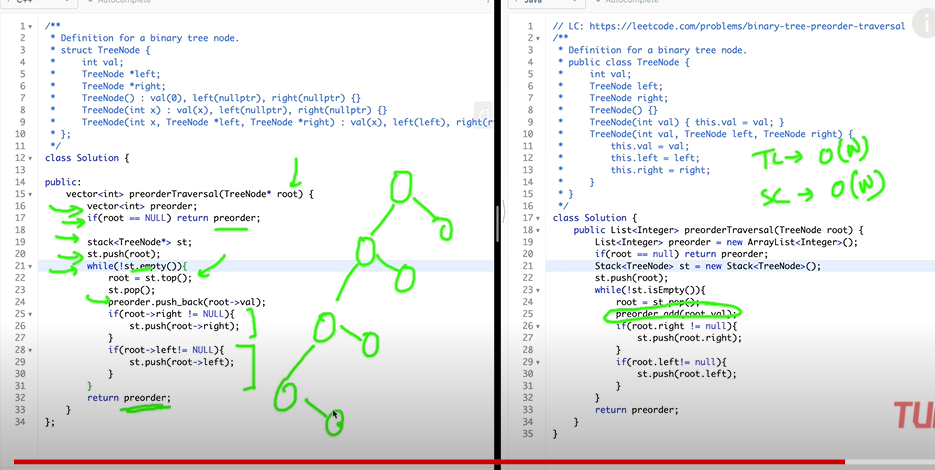


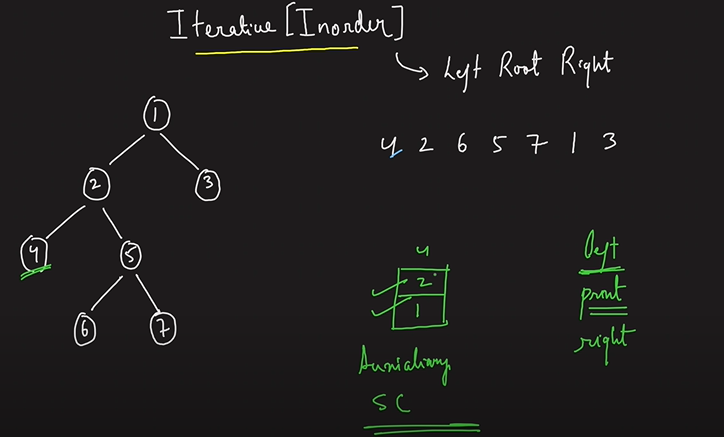

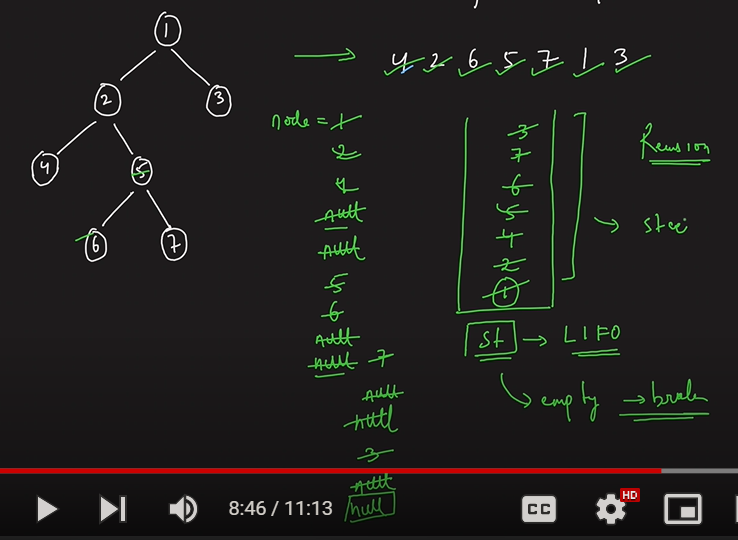

In [ ]:
class BST:

    def __init__(self,data):
        self.data=data
        self.left=None
        self.right=None
  
    def addchild(self,data):
    #if already pressnt -> dont add so return  
        if data==self.data:
            return 
    
        elif (data<self.data):#root greater than val -> add to left sub tree
       
          #if left node has a left child -> then add a child to it 
            if self.left:
                self.left.addchild(data)

          #if no vals already present 
            else:
                self.left=BST(data)

        #val > root -> add to right ST 
        else:

            if self.right:
                self.right.addchild(data)
      
            else:
                self.right=BST(data)
    
    
    def search(self,val):
        if self.data==val:
            return True 
        
        if val< self.data:
            if self.left:
                return self.left.search(val)
            else:#not presnt 
                return False
            
        if val>self.data:
            if self.right:
                self.right.search(val)
            else:
                return False 
    
    
    def inorder_traversal(self):
        elements=[]

      #start from left note 
        if self.left:
            elements+=self.left.inorder_traversal()
      
      
        elements.append(self.data)

        if self.right:
            elements+=self.right.inorder_traversal()

        return elements 
    
    def preorder_traversal(self):
        elements=[]
        
        elements.append(self.data)
        
        if self.left:
            elements+=self.left.preorder_traversal()
            
        if self.right:
            elements+=self.right.preorder_traversal()
            
        return elements

    def postorder_traversal(self):
        elements=[]
        elements.append(self.data)
            
        if self.right:
            elements+=self.right.postorder_traversal()
        if self.left:
            elements+=self.left.postorder_traversal()
     
        return elements
    
    def find_min(self):
        
        if self.left==None:
            return self.data
        return self.left.find_min()
    
    def find_max(self):
        if self.right==None:
            return self.data
        return self.right.find_max()
    
    def calculate_sum(self):
        
        leftsum,rightsum=0,0
        if self.left:
            leftsum+= self.left.calculate_sum()
            
        if self.right:
            rightsum+=self.right.calculate_sum()
        print("ls",leftsum,"rs",rightsum,"nv",self.data)
        return leftsum+rightsum+self.data
        
    
  # builder mtd 
def buildtree(elements):
        
    root=BST(elements[0])
    for i in range(2,len(elements)):
            root.addchild(elements[i])
        
    return root

if __name__=="__main__":
    
    nums_tree=buildtree([17, 4, 1, 20, 9, 23, 18, 24])
    
    print("org tree--",[17, 4, 1, 20, 9, 23, 18, 24])
    print("inorder--",nums_tree.inorder_traversal())
    print("pre-order--",nums_tree.preorder_traversal())
    print("post-order--",nums_tree.postorder_traversal())
    
    
    print("searching --",nums_tree.search(1))

    print("min in tree--",nums_tree.find_min())
    
    print("calc sum --",nums_tree.calculate_sum())

org tree-- [17, 4, 1, 20, 9, 23, 18, 24]
inorder-- [1, 9, 17, 18, 20, 23, 24]
pre-order-- [17, 1, 9, 20, 18, 23, 24]
post-order-- [17, 20, 23, 24, 18, 1, 9]
searching -- True
min in tree-- 1
ls 0 rs 0 nv 9
ls 0 rs 9 nv 1
ls 0 rs 0 nv 18
ls 0 rs 0 nv 24
ls 0 rs 24 nv 23
ls 18 rs 47 nv 20
ls 10 rs 85 nv 17
calc sum -- 112


1. find_min(): finds minimum element in entire binary tree
2. find_max(): finds maximum element in entire binary tree
3. calculate_sum(): calcualtes sum of all elements
4. post_order_traversal(): performs post order traversal of a binary tree
5. pre_order_traversal(): perofrms pre order traversal of a binary tree